In [16]:
import numpy as np
import torch.nn.functional as F

In [17]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize( (0.5), (0.5) ),
])

trainset = datasets.MNIST('./train_MNIST_data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [18]:
testset = datasets.MNIST('./test_MNIST_data', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [19]:
from torch import nn
from torch import optim

In [20]:
network = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1),
)

criterion = nn.NLLLoss()

optimizer = optim.SGD(network.parameters(), lr=0.003)

In [21]:
def train(neural_network, epochs, loader, report_every=5):
    neural_network.train()
    for e in range(epochs):
        running_loss = 0
        for images, labels in loader:
            optimizer.zero_grad()

            images = images.view(images.shape[0], -1)

            output = neural_network.forward(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        else:
            if (e % report_every == 0):
                print(f'Epoch {e}/{epochs} Training Loss: {running_loss/len(trainloader)}')
    print(f'Epoch {e}/{epochs} Training Loss: {running_loss/len(trainloader)}')

In [22]:
def save_model_state(model, file):
    torch.save(model.state_dict(), file)

In [41]:
TRAIN = False

if TRAIN:
    train(network, 50, trainloader)
    save_model_state(network, './model.pth')

hello


In [42]:
def load_state(file):
    return torch.load(file)

In [43]:
network.load_state_dict(load_state('./model.pth'))

<All keys matched successfully>

In [44]:
def test(neural_network, loader):
    test_loss = 0.0
    numerals_correct = list(0. for i in range(10))
    numerals_total = list(0. for i in range(10))
    
    neural_network.eval()
    for images, label in loader:
        images = images.view(images.shape[0], -1)
        
        output = neural_network.forward(images)
        loss = criterion(output, label)
        
        test_loss += loss.item() * images.size(0)
        
        _, pred = torch.max(output, 1)
        correct_tensor = pred.eq(label.data.view_as(pred))
        correct = np.squeeze(correct_tensor.numpy())
        
        for i in range(label.size()[0]):
            numeral = label.data[i]
            numerals_correct[numeral] += correct[i].item()
            numerals_total[numeral] += 1
        
    test_loss = test_loss / len(loader.dataset)
    print('Test Loss: %.6f\n' % test_loss)
    
    for i in range(10):
        if numerals_total[i] > 0:
            print('Test Accuracy of %d: %d%% (%2d/%2d)' % (i,
                                                           100 * (numerals_correct[i] / numerals_total[i]),
                                                           np.sum(numerals_correct[i]),
                                                           np.sum(numerals_total[i])))
        else:
            print('Test Accuracy of %d: 0%' % i)
    print('\nTest Accuracy (Overall): %d%% ( %2d/%2d )' % (100. * np.sum(numerals_correct) / np.sum(numerals_total),
                                                         np.sum(numerals_correct),
                                                         np.sum(numerals_total)))

In [45]:
import matplotlib.pyplot as plt

def imshow(image, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    
    ax.imshow(image.resize_(1, 28, 28).numpy().squeeze(), cmap='gray')
    ax.axis('off')
    
    return ax

def show_im_probabilities(image, probabilities):
    probabilities = probabilities.numpy().squeeze()
    
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    
    imshow(image, ax1)
    
    ax2.barh(np.arange(10), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Numeral Probability')
    ax2.set_xlim(0, 1.1)
    
    plt.tight_layout()

In [46]:
def present(images, labels, neural_network):
    images = images.view(64, -1)
    with torch.no_grad():
        output = neural_network.forward(images)
    
    _, pred = torch.max(output, 1)
        
    fig = plt.figure(1)
    
    idx = 0
    for image, prediction, label in list(zip(images, pred.numpy(), labels.numpy()))[:20]:
        ax = fig.add_subplot(4, 5, idx+1, xticks=[], yticks=[])
        imshow(image, ax)
        ax.set_title(f'P:{prediction} R:{label}', color=("green" if prediction == label else  "red"))
        idx += 1
    
    fig.tight_layout()

In [47]:
test(network, testloader)

Test Loss: 0.124155

Test Accuracy of 0: 98% (965/980)
Test Accuracy of 1: 98% (1115/1135)
Test Accuracy of 2: 96% (996/1032)
Test Accuracy of 3: 96% (970/1010)
Test Accuracy of 4: 96% (944/982)
Test Accuracy of 5: 94% (844/892)
Test Accuracy of 6: 96% (928/958)
Test Accuracy of 7: 95% (986/1028)
Test Accuracy of 8: 95% (928/974)
Test Accuracy of 9: 94% (949/1009)

Test Accuracy (Overall): 96% ( 9625/10000 )


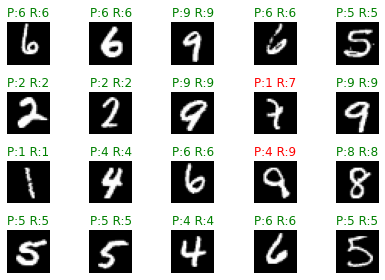

In [48]:
images, labels = next(iter(testloader))
present(images, labels, network)